In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2
import os
from zipfile import ZipFile
import time
from datetime import datetime
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,ZeroPadding2D,Activation
from tensorflow.keras.layers import Conv2D, AveragePooling2D, GlobalAveragePooling2D, MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from tensorflow.keras import utils
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

import pickle
from keras.utils import np_utils
from sklearn.utils import shuffle


np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def plot_history(history_fine):
  f1 = history_fine.history['accuracy']
  val_f1 = history_fine.history['val_accuracy']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

def plot_reg_history(history_fine):
  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']
  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

In [ ]:
# Load Data 
import pickle
from google.colab import drive

In [ ]:
with open('/content/drive/MyDrive/model_AI/train_age_4.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)

In [ ]:
# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255

# Encoding Y
y_train = np_utils.to_categorical(y_train, 8)

# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = "Same", activation = "relu", input_shape = (150,150,3)))
model.add(Conv2D(140,(3,3),activation="relu"))

model.add(Conv2D(130,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))

model.add(Conv2D(120,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))

model.add(Conv2D(120,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(8))
model.add(Activation("softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 25, batch_size = 128, validation_split = 0.2)


Epoch 1/25
46/46 [==============================] - 56s 1s/step - loss: 3.5651 - accuracy: 0.2995 - val_loss: 2.6932 - val_accuracy: 0.2328
Epoch 2/25
46/46 [==============================] - 54s 1s/step - loss: 2.6536 - accuracy: 0.3911 - val_loss: 2.1919 - val_accuracy: 0.2857
Epoch 3/25
46/46 [==============================] - 55s 1s/step - loss: 2.3787 - accuracy: 0.4257 - val_loss: 3.1231 - val_accuracy: 0.2637
Epoch 4/25
46/46 [==============================] - 54s 1s/step - loss: 2.2705 - accuracy: 0.4296 - val_loss: 2.6230 - val_accuracy: 0.2734
Epoch 5/25
46/46 [==============================] - 54s 1s/step - loss: 2.2652 - accuracy: 0.4547 - val_loss: 2.3861 - val_accuracy: 0.3008
Epoch 6/25
46/46 [==============================] - 54s 1s/step - loss: 1.8892 - accuracy: 0.5129 - val_loss: 2.3217 - val_accuracy: 0.3159
Epoch 7/25
46/46 [==============================] - 54s 1s/step - loss: 1.7856 - accuracy: 0.5258 - val_loss: 4.1350 - val_accuracy: 0.3049
Epoch 8/25
46/46 [==

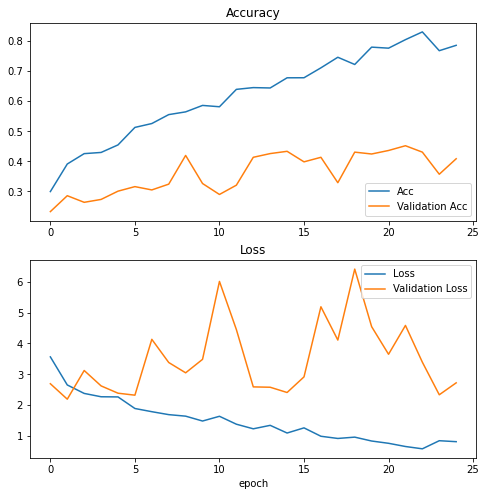

In [ ]:
plot_history(history)

In [ ]:
model.save("model_age_10.h5")